In [72]:
import numpy as np
import pandas as pd


In [73]:
data_df = pd.read_csv('auto-mpg.csv', header=0)
data_df.shape


(398, 9)

In [74]:
data_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [75]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [76]:
data_df = data_df.drop(
    ['car_name', 'origin', 'horsepower'], axis=1)
data_df.shape


(398, 6)

In [77]:
# X(mpg 제외한 나머지), Y(mpg) 분할
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1)


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)
X_train


,cylinders,displacement,weight,acceleration,model_year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81
140,8,304.0,4257,15.5,74
22,4,104.0,2375,17.5,70
250,8,318.0,3735,13.2,78
...,...,...,...,...,...
323,4,156.0,2800,14.4,80
192,6,250.0,3353,14.5,76
117,4,68.0,1867,19.5,73
47,6,250.0,3282,15.0,71


In [79]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)
Y_predict


array([12.68813886, 24.89235692, 11.77966226, 20.713484  , 17.59974974,
       28.70463932, 31.8246109 , 24.79459783, 13.3797074 , 28.03809202,
       33.95480562, 32.517138  , 21.28643713, 26.32547953, 16.29305741,
       32.16905355, 30.04731897, 29.90617451, 17.78110613, 30.69577551,
       15.33574367, 25.60299563, 25.4723533 , 20.04730443, 30.70244174,
       26.79576507, 32.20306918, 31.95533215, 30.42830733, 18.19432511,
       21.19981862, 29.62938625, 20.86352443, 30.82503708, 24.35511863,
       23.81034331, 21.45816755, 16.77101118, 31.95362794,  8.06590693,
        9.60178767, 13.8699291 , 27.26165312, 29.00102026, 29.52364892,
       22.58571769, 23.20233694, 13.80533693, 23.86039376, 28.12535283,
       31.40954528, 26.70297991, 15.34381889, 25.01897062, 14.71481708,
        9.53883961, 19.64272577, 26.82491432, 31.30917854, 14.99268593,
       20.64360774, 25.57610711, 22.45200894, 19.72033566, 10.7918702 ,
       11.42513414,  9.7023088 , 19.68724093, 24.98227534,  9.68

In [80]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_predict)

print('mse: {0:.3f}'.format(mse))
print('rmse: {0:.3f}'.format(rmse))
print('R^2: {0:.3f}'.format(r2))

print('Y절편값:', np.round(lr.intercept_, 2))
print('회귀계수(기울기):', np.round(lr.coef_, 2))


mse: 12.278
rmse: 3.504
R^2: 0.808
Y절편값: -17.55
회귀계수(기울기): [-0.14  0.01 -0.01  0.2   0.76]


In [81]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)


model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [82]:
print('연비를 예측하고 싶은 차의 정보를 입력해주세요.')
cylinders_1 = int(input('cylinders: '))  # 8
displacement_1 = int(input('displacement: '))  # 350
weight_1 = int(input('weight: '))  # 3200
acceleration_1 = int(input('acceleration: '))  # 22
model_year_1 = int(input('model_year: '))  # 99


연비를 예측하고 싶은 차의 정보를 입력해주세요.


In [86]:
mpg_predict = lr.predict(
    [[cylinders_1, displacement_1, weight_1, acceleration_1, model_year_1]])
mpg_predict


array([41.31991868])

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns


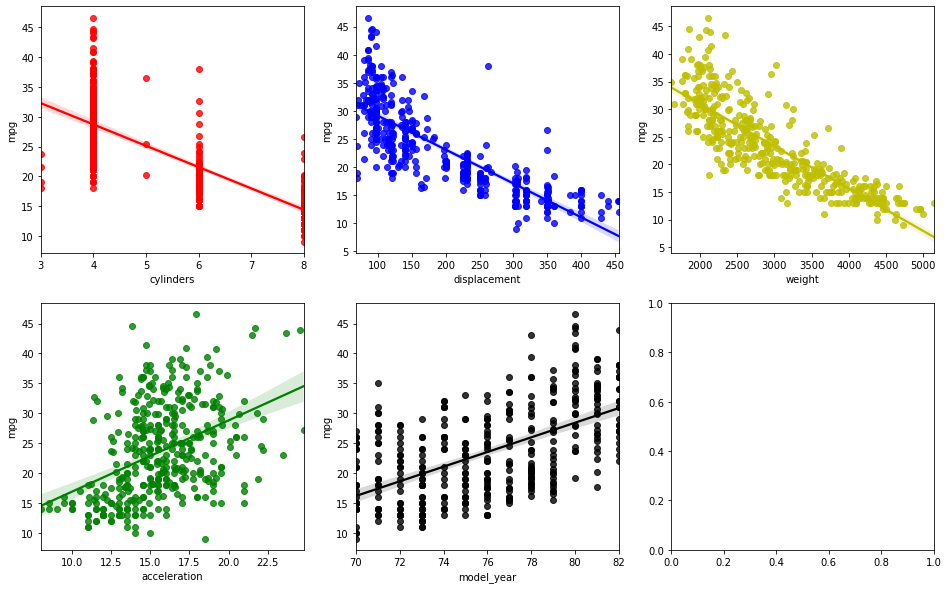

In [85]:
x_features = ['cylinders', 'displacement',
              'weight', 'acceleration', 'model_year']

fig, axs = plt.subplots(figsize=(16, 10), ncols=3, nrows=2)
plot_color = ['r', 'b', 'y', 'g', 'black']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i % 3
    # print(row, col)

    sns.regplot(x=feature, y='mpg', data=data_df,
                ax=axs[row][col], color=plot_color[i])
